In [1]:
# Librerias
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dash
from dash import dcc
from dash import html
import pandas as pd
import plotly.express as px
import plotly.express as px
import geopandas as gpd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Lectura de la base de datos
archivo_pickle = 'Entrenamiento_cronicas_N.pkl'
with open(archivo_pickle, 'rb') as file:
    data_ori = pickle.load(file)
    
archivo_pickle_1 = 'base_epsilon_1.0.pkl'
with open(archivo_pickle_1, 'rb') as file:
    data_ori_1 = pickle.load(file)

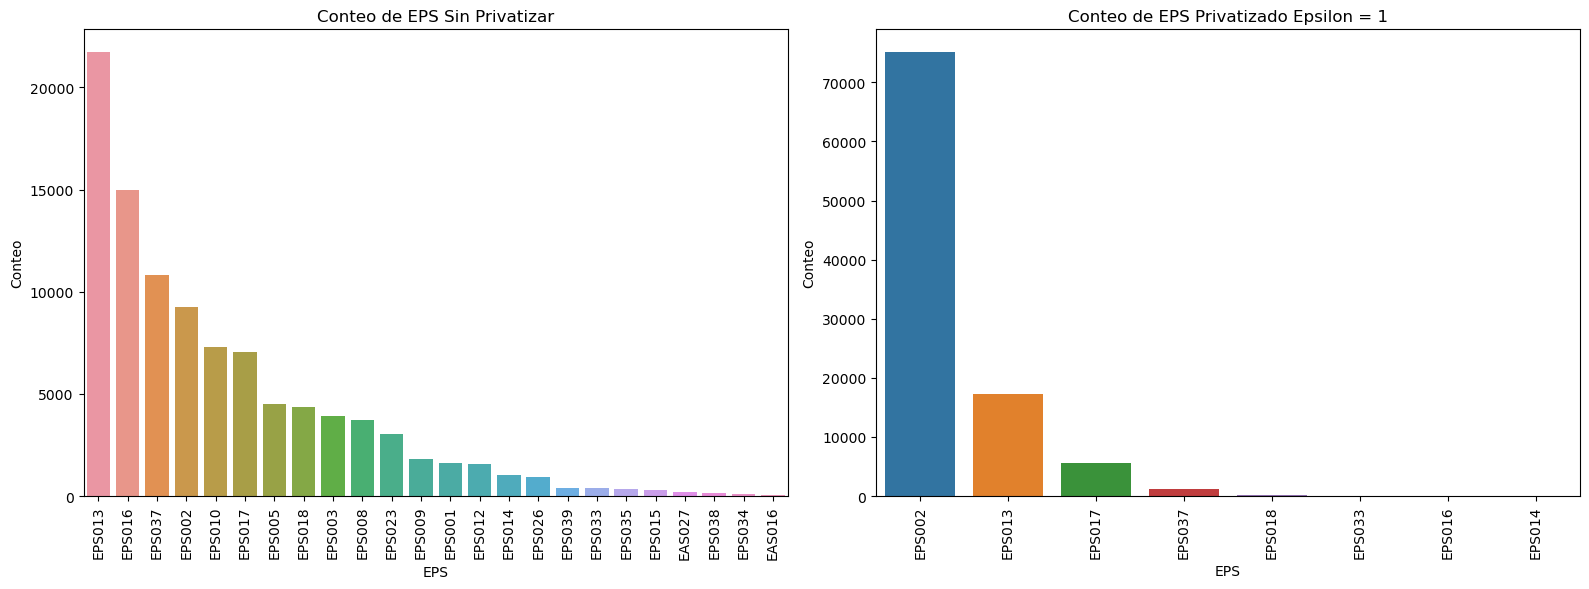

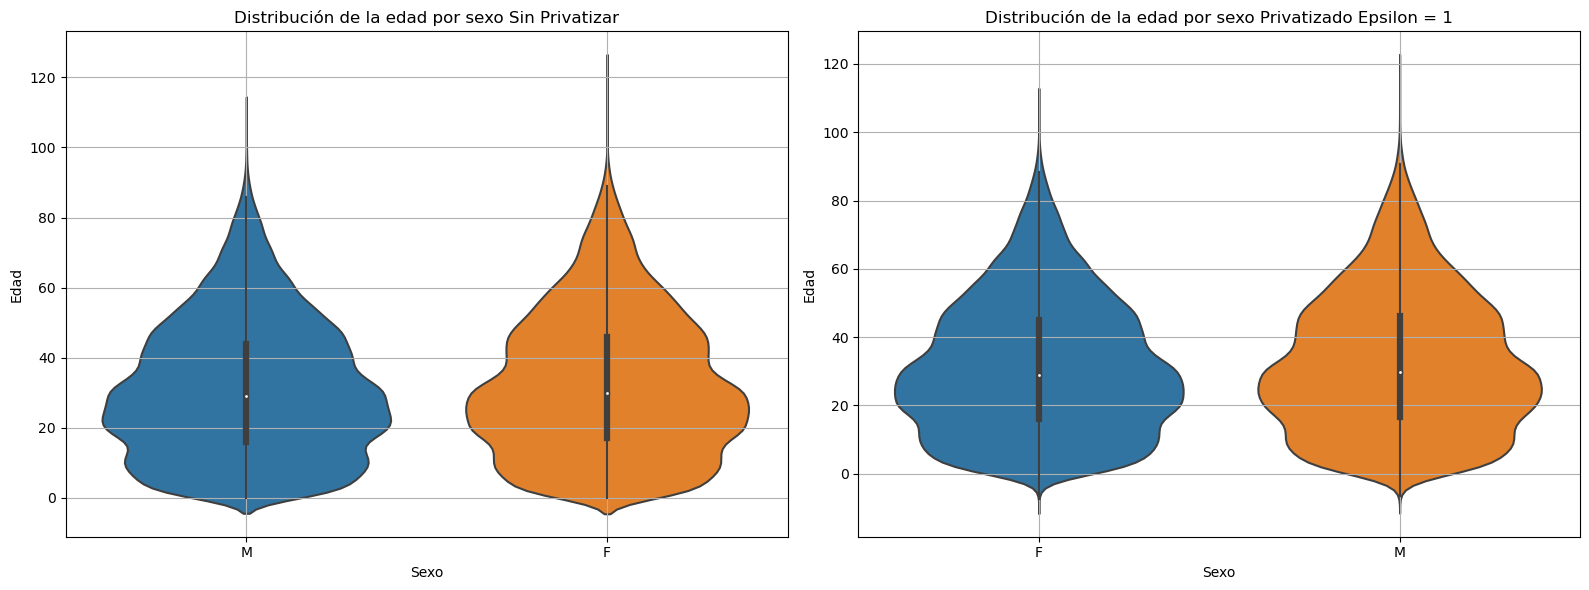

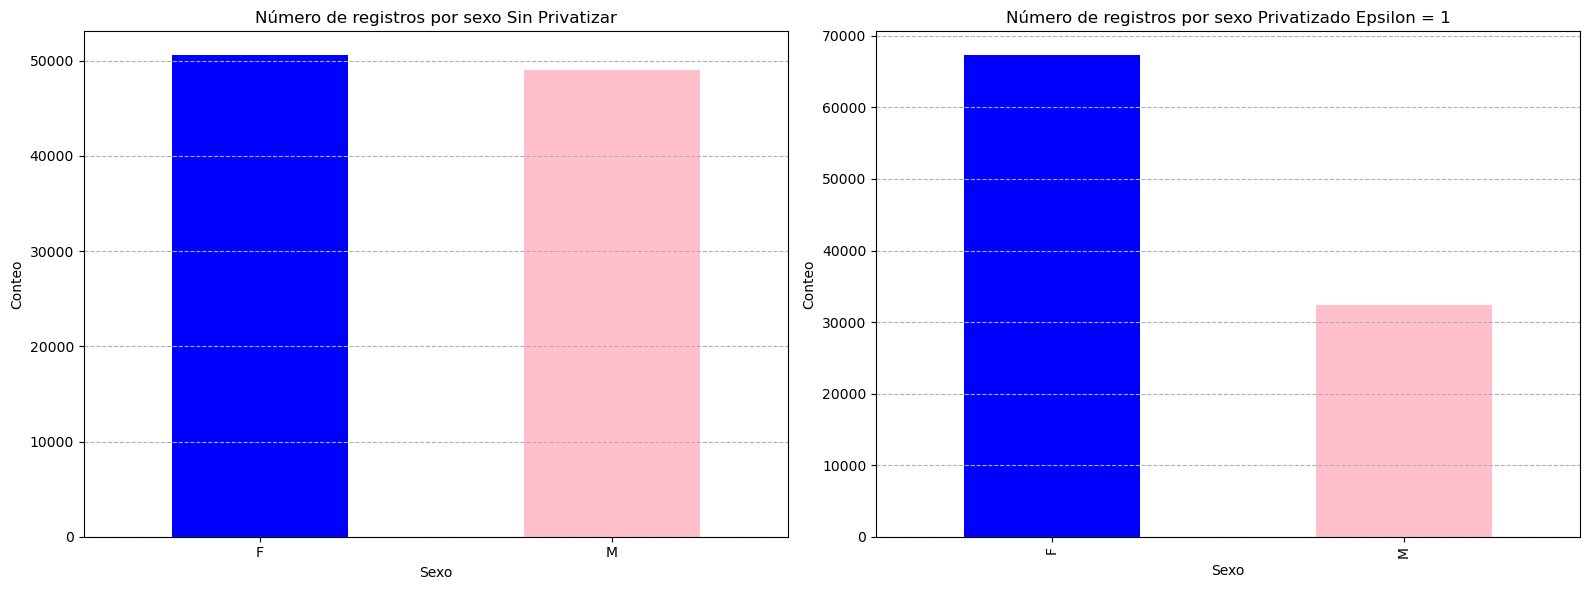

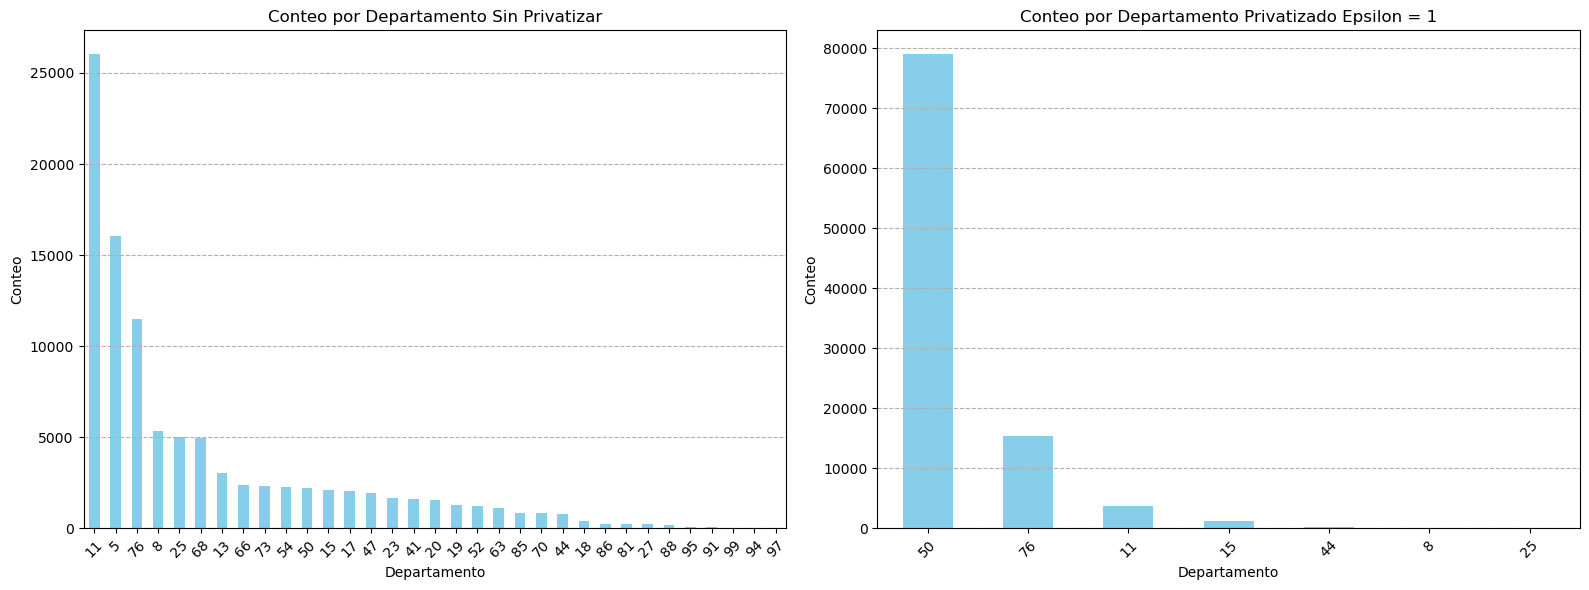

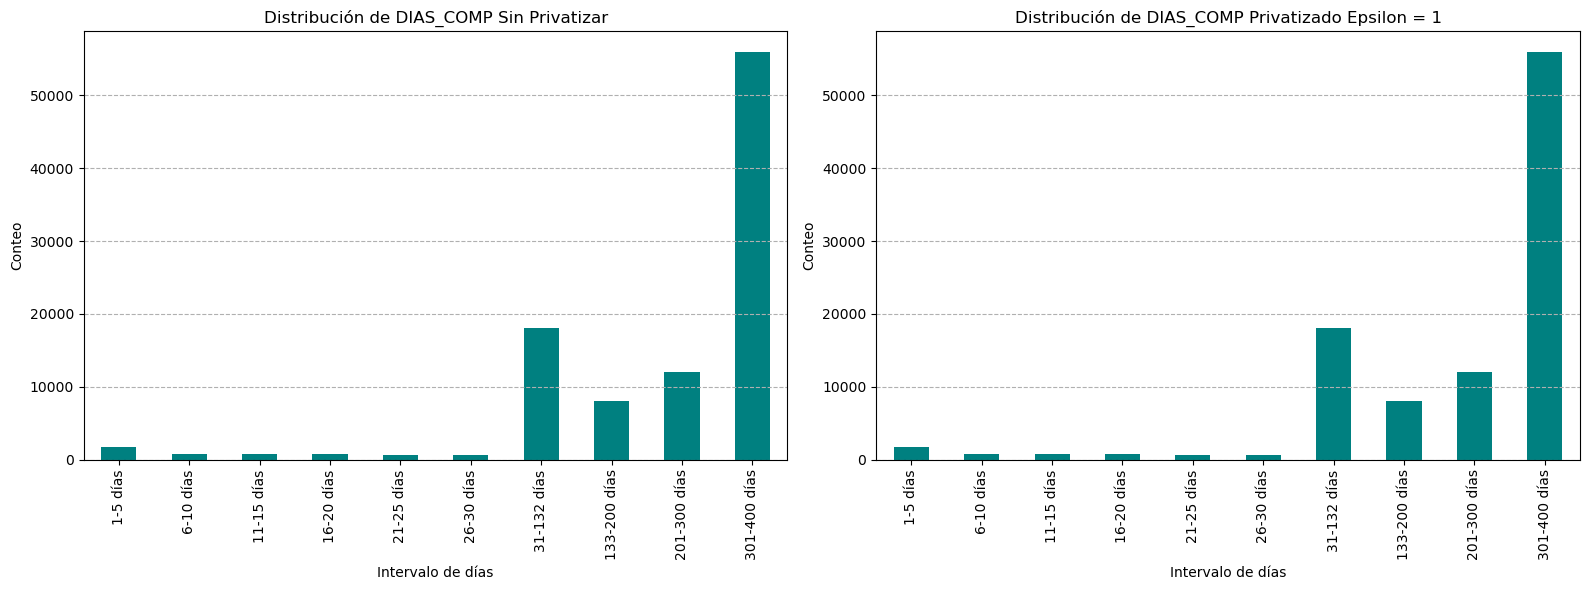

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


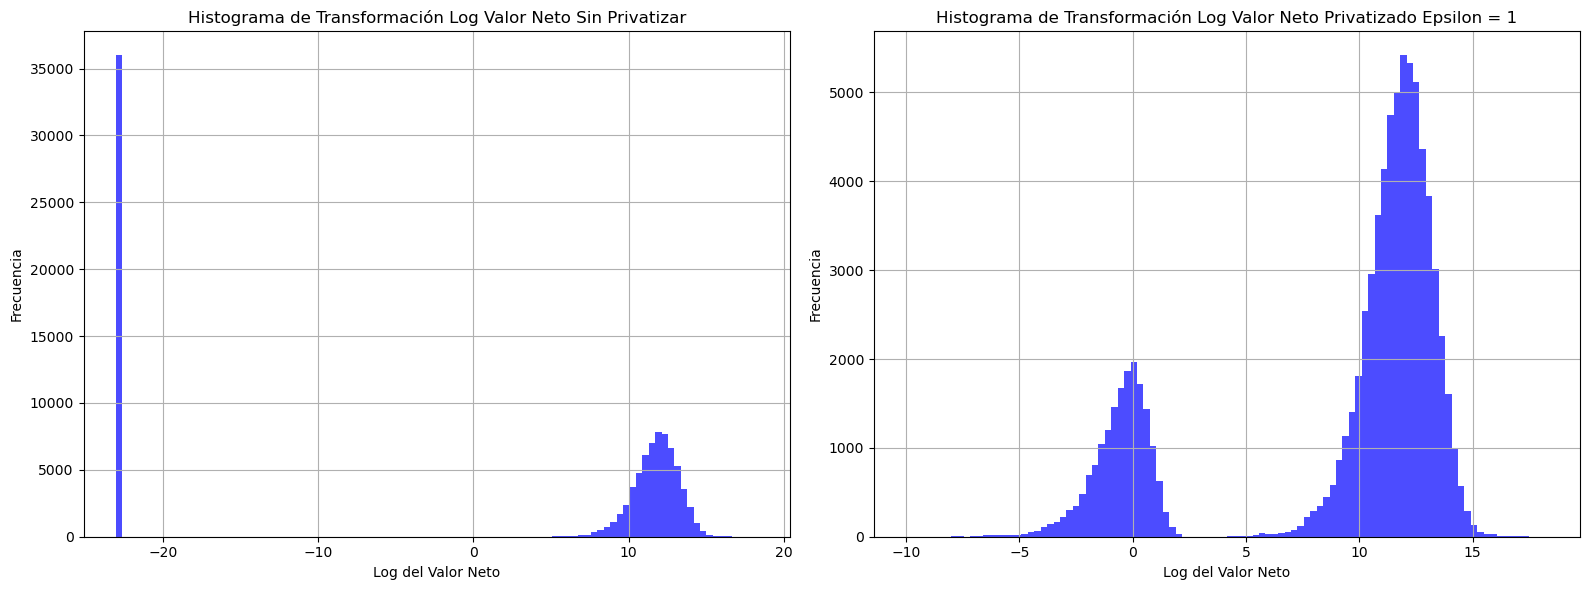

In [4]:
data = data_ori.sample(frac=0.1, random_state=42) 
data_1 = data_ori_1.sample(frac=0.1, random_state=42) 

import matplotlib.pyplot as plt
import numpy as np

data['FECHA_NACI'] = pd.to_datetime(data['FECHA_NACI'])
data = data.drop(columns=['Valor_Neto_Chunk','DIAS_ESTAN_Neto_Chunk'])

# Crear una figura y un arreglo de ejes
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

# Primera gráfica: Countplot para 'EPS'
sns.countplot(x='EPS', data=data, order=data['EPS'].value_counts().index, ax=axs[0])
axs[0].set_title('Conteo de EPS Sin Privatizar')
axs[0].set_xlabel('EPS')
axs[0].set_ylabel('Conteo')
axs[0].tick_params(axis='x', rotation=90)

# Segunda gráfica: Countplot para 'OtraColumna'
sns.countplot(x='EPS', data=data_1, order=data_1['EPS'].value_counts().index, ax=axs[1])
axs[1].set_title('Conteo de EPS Privatizado Epsilon = 1')
axs[1].set_xlabel('EPS')
axs[1].set_ylabel('Conteo')
axs[1].tick_params(axis='x', rotation=90)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Guardar la figura
plt.savefig('Conteo_EPS.png')

# Mostrar la figura
plt.show()

# Crear la figura y los ejes para dos subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

# Gráfica de Violinplot para 'Sexo'
sns.violinplot(x='SEXO', y='Edad', data=data, ax=axs[0])
axs[0].set_title('Distribución de la edad por sexo Sin Privatizar')
axs[0].set_xlabel('Sexo')
axs[0].set_ylabel('Edad')
axs[0].grid(True)

# Gráfica de Violinplot para 'Region'
sns.violinplot(x='SEXO', y='Edad', data=data_1, ax=axs[1])
axs[1].set_title('Distribución de la edad por sexo Privatizado Epsilon = 1')
axs[1].set_xlabel('Sexo')
axs[1].set_ylabel('Edad')
axs[1].grid(True)

# Ajustar automáticamente el espacio para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

# Guardar la figura
fig.savefig('edad vs sexo.png')

sexo_counts = data['SEXO'].value_counts()
sexo_counts_1 = data_1['SEXO'].value_counts()

# Crear la figura y los ejes para dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

# Gráfica de barras para 'SEXO'
sexo_counts.plot(kind='bar', color=['blue', 'pink'], ax=ax1)  # Ajusta los colores si es necesario
ax1.set_title('Número de registros por sexo Sin Privatizar')
ax1.set_xlabel('Sexo')
ax1.set_ylabel('Conteo')
ax1.set_xticks(range(len(sexo_counts)))  # Asegura que todas las etiquetas sean mostradas
ax1.set_xticklabels(sexo_counts.index, rotation=0)  # Mantiene las etiquetas horizontales
ax1.grid(axis='y', linestyle='--')  # Agrega líneas de cuadrícula horizontales

# Gráfica de barras para 'DPTO'
sexo_counts_1.plot(kind='bar', color=['blue', 'pink'], ax=ax2)
ax2.set_title('Número de registros por sexo Privatizado Epsilon = 1')
ax2.set_xlabel('Sexo')
ax2.set_ylabel('Conteo')
ax2.set_xticks(range(len(sexo_counts_1)))  # Asegura que todas las etiquetas sean mostradas
ax2.set_xticklabels(sexo_counts_1.index, rotation=90)  # Rota las etiquetas para mejor lectura
ax2.grid(axis='y', linestyle='--')  # Agrega líneas de cuadrícula horizontales

# Ajustar automáticamente el espacio para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

# Guardar la figura
fig.savefig('Sexo.png')

dpto_counts = data['DPTO'].value_counts()
dpto_counts_1 = data_1['DPTO'].value_counts()

# Crear la figura y los ejes para dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

# Gráfica de barras para 'DPTO'
dpto_counts.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Conteo por Departamento Sin Privatizar')
ax1.set_xlabel('Departamento')
ax1.set_ylabel('Conteo')
ax1.set_xticklabels(dpto_counts.index, rotation=45)
ax1.grid(axis='y', linestyle='--')

# Histograma para 'DIAS_COMP'
dpto_counts_1.plot(kind='bar', color='skyblue', ax=ax2)
ax2.set_title('Conteo por Departamento Privatizado Epsilon = 1')
ax2.set_xlabel('Departamento')
ax2.set_ylabel('Conteo')
ax2.set_xticklabels(dpto_counts_1.index, rotation=45)
ax2.grid(axis='y', linestyle='--')

# Ajustar el layout para hacer espacio para las etiquetas rotadas
plt.tight_layout()

# Mostrar la figura
plt.show()

# Guardar la figura
fig.savefig('dpto.png')

# Supongamos que 'data' es tu DataFrame y ya está cargado y preparado
# Convertir la columna 'DIAS_COMP' a numérico y manejar errores
data['DIAS_COMP'] = pd.to_numeric(data['DIAS_COMP'], errors='coerce')

# Definir bins y etiquetas para la categorización
bins = [0, 5, 10, 15, 20, 25, 30, 132, 200, 300, 400]
labels = ['1-5 días', '6-10 días', '11-15 días', '16-20 días', '21-25 días', '26-30 días', '31-132 días', '133-200 días', '201-300 días', '301-400 días']

# Categorizar 'DIAS_COMP' en los bins definidos
data['DIAS_COMP_Binned'] = pd.cut(data['DIAS_COMP'], bins=bins, labels=labels, right=False)

# Contar el número de ocurrencias en cada bin
binned_counts = data['DIAS_COMP_Binned'].value_counts().sort_index()
# Convertir la columna 'DIAS_COMP' a numérico y manejar errores
data_1['DIAS_COMP'] = pd.to_numeric(data_1['DIAS_COMP'], errors='coerce')

# Definir bins y etiquetas para la categorización
bins = [0, 5, 10, 15, 20, 25, 30, 132, 200, 300, 400]
labels = ['1-5 días', '6-10 días', '11-15 días', '16-20 días', '21-25 días', '26-30 días', '31-132 días', '133-200 días', '201-300 días', '301-400 días']

# Categorizar 'DIAS_COMP' en los bins definidos
data_1['DIAS_COMP_Binned'] = pd.cut(data_1['DIAS_COMP'], bins=bins, labels=labels, right=False)

# Contar el número de ocurrencias en cada bin
binned_counts_1 = data_1['DIAS_COMP_Binned'].value_counts().sort_index()

# Crear la figura y los ejes para dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

# Gráfica en el primer eje (ax1)
binned_counts.plot(kind='bar', color='teal', ax=ax1)
ax1.set_title('Distribución de DIAS_COMP Sin Privatizar')
ax1.set_xlabel('Intervalo de días')
ax1.set_ylabel('Conteo')
ax1.grid(axis='y', linestyle='--')

# Gráfica en el segundo eje (ax2), idéntica a la primera
binned_counts_1.plot(kind='bar', color='teal', ax=ax2)
ax2.set_title('Distribución de DIAS_COMP Privatizado Epsilon = 1')
ax2.set_xlabel('Intervalo de días')
ax2.set_ylabel('Conteo')
ax2.grid(axis='y', linestyle='--')

# Ajustar el layout para evitar solapamiento y asegurar que todo sea visible
plt.tight_layout()

# Mostrar la figura
plt.show()

# Guardar la figura
fig.savefig('DIAS_COMP.png')

# Aplicar transformación logarítmica, agregando un pequeño valor para evitar el logaritmo de cero
data['Valor_Neto_Log'] = np.log(data['Valor_Neto'] + 1e-10)
data_1['Valor_Neto_Log'] = np.log(data_1['Valor_Neto'] + 1e-10)

# Crear la figura y los ejes para dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

# Histograma en el primer eje (ax1)
ax1.hist(data['Valor_Neto_Log'], bins=100, color='blue', alpha=0.7)
ax1.set_title('Histograma de Transformación Log Valor Neto Sin Privatizar')
ax1.set_xlabel('Log del Valor Neto')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Histograma en el segundo eje (ax2), idéntico al primero
ax2.hist(data_1['Valor_Neto_Log'], bins=100, color='blue', alpha=0.7)
ax2.set_title('Histograma de Transformación Log Valor Neto Privatizado Epsilon = 1')
ax2.set_xlabel('Log del Valor Neto')
ax2.set_ylabel('Frecuencia')
ax2.grid(True)

# Ajustar el layout para evitar solapamiento y asegurar que todo sea visible
plt.tight_layout()

# Guardar la figura
fig.savefig('Log_Valor_Neto.png')

# Mostrar la figura
plt.show()

In [4]:
## Modelo sin privatizar
df = data_ori.copy()

# Convertir columnas y eliminar las no necesarias
df['DIAS_COMP'] = df['DIAS_COMP'].astype(float)
df.drop(columns=['NUM_IDE', 'FECHA_NACI', 'id', 'MUNI'], inplace=True)

# Eliminar filas con valores nulos
df = df.dropna()

# Binarizar las variables binarias especificadas
binary_columns = [
    'SIDA_VIH', 'TUBERCULOSIS', 'CANCER_OTROSCANCER', 'CANCER_ORGANOSDIGESTIVOS',
    'CANCER_ORGANOSRESPIRATORIOS', 'CANCER_MELANOMAYDELAPIEL', 'CANCER_MAMA',
    'CANCER_OTROSGENITALESFEMENINOS', 'CANCER_CERVIXINVASIVO', 'CANCER_GENITALESMASCULINOS',
    'CANCER_TEJIDOLINFATICOYAFINES', 'CANCER_CERVIXINSITU', 'AUTOINMUNE', 'DIABETES',
    'SINDROMESCONVULSIVOS(EPILEPSIA)', 'ENFERMEDADCARDIOVASCULAR_OTRA', 'ENFERMEDADCARDIOVASCULAR_HIPERTENSION',
    'ENFERMEDADPULMONARDELARGADURACION', 'ASMA', 'ARTRITISPIOGENASYREACTIVAS',
    'ARTRITIS', 'ARTROSIS', 'RENAL_OTRA', 'RENAL_RENALDELARGADURACION', 'TRANSPLANTE',
    'RENAL_INSUFICIENCIARENALOTRA', 'RENAL_INSUFICIENCIARENALCRONICA', 'ANOMALIASGENETICASYCONGENITAS',
    'CANCER_TERAPIACANCER'
]
df[binary_columns] = df[binary_columns].fillna(0).astype(int)

# Aplicar One-Hot Encoding a las variables categóricas
categorical_columns = ['EPS', 'SEXO', 'DPTO', 'V8', 'Grupo_Edad', 'Zona']
encoder = OneHotEncoder()
encoded_categoricals = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_categoricals.toarray(), columns=encoder.get_feature_names_out(categorical_columns), index=df.index)

# Concatenar los datos codificados con el resto del dataframe
df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Asegurarte de que las columnas necesarias estén en el DataFrame y en el orden correcto
expected_columns = [
    'DIAS_COMP', 'DIAS_ESTAN_Neto', 'Edad', 'SIDA_VIH', 'TUBERCULOSIS', 'CANCER_OTROSCANCER',
    'CANCER_ORGANOSDIGESTIVOS', 'CANCER_ORGANOSRESPIRATORIOS', 'CANCER_MELANOMAYDELAPIEL', 'CANCER_MAMA',
    'CANCER_OTROSGENITALESFEMENINOS', 'CANCER_CERVIXINVASIVO', 'CANCER_GENITALESMASCULINOS', 'CANCER_TEJIDOLINFATICOYAFINES',
    'CANCER_CERVIXINSITU', 'AUTOINMUNE', 'DIABETES', 'SINDROMESCONVULSIVOS(EPILEPSIA)', 'ENFERMEDADCARDIOVASCULAR_OTRA',
    'ENFERMEDADCARDIOVASCULAR_HIPERTENSION', 'ENFERMEDADPULMONARDELARGADURACION', 'ASMA', 'ARTRITISPIOGENASYREACTIVAS', 'ARTRITIS',
    'ARTROSIS', 'RENAL_OTRA', 'RENAL_RENALDELARGADURACION', 'TRANSPLANTE', 'RENAL_INSUFICIENCIARENALOTRA',
    'RENAL_INSUFICIENCIARENALCRONICA', 'ANOMALIASGENETICASYCONGENITAS', 'CANCER_TERAPIACANCER', 'EPS_EAS016', 'EPS_EAS027',
    'EPS_EPS001', 'EPS_EPS002', 'EPS_EPS003', 'EPS_EPS005', 'EPS_EPS008', 'EPS_EPS009', 'EPS_EPS010', 'EPS_EPS012',
    'EPS_EPS013', 'EPS_EPS014', 'EPS_EPS015', 'EPS_EPS016', 'EPS_EPS017', 'EPS_EPS018', 'EPS_EPS023', 'EPS_EPS026',
    'EPS_EPS033', 'EPS_EPS034', 'EPS_EPS035', 'EPS_EPS037', 'EPS_EPS038', 'EPS_EPS039', 'SEXO_F', 'SEXO_M', 'DPTO_11',
    'DPTO_13', 'DPTO_15', 'DPTO_17', 'DPTO_18', 'DPTO_19', 'DPTO_20', 'DPTO_23', 'DPTO_25', 'DPTO_27', 'DPTO_41',
    'DPTO_44', 'DPTO_47', 'DPTO_5', 'DPTO_50', 'DPTO_52', 'DPTO_54', 'DPTO_63', 'DPTO_66', 'DPTO_68', 'DPTO_70',
    'DPTO_73', 'DPTO_76', 'DPTO_8', 'DPTO_81', 'DPTO_85', 'DPTO_86', 'DPTO_88', 'DPTO_91', 'DPTO_94', 'DPTO_95',
    'DPTO_97', 'DPTO_99', 'V8_A', 'V8_B', 'V8_C', 'Grupo_Edad_1', 'Grupo_Edad_10', 'Grupo_Edad_11', 'Grupo_Edad_12',
    'Grupo_Edad_2', 'Grupo_Edad_3', 'Grupo_Edad_4', 'Grupo_Edad_5', 'Grupo_Edad_6', 'Grupo_Edad_7', 'Grupo_Edad_8',
    'Grupo_Edad_9', 'Zona_C', 'Zona_N', 'Zona_Z'
]

df = df[expected_columns]

with open('model_sinpriv.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

predictions = loaded_model.predict(df)
predictions

array([-76392.55  , 763655.7   , -33250.492 , ...,   3222.9165,
        -5801.406 , -62627.    ], dtype=float32)

In [8]:
## Modelo privatizado
df_1=data_ori_1.copy() 
# Crear variables dummies para la columna 'Enfermedad'
df_1['Enfermedad'] = df_1['Enfermedad'].str.split(',')
enfermedades_dummies_1 = df_1['Enfermedad'].str.join('|').str.get_dummies()
df_1 = pd.concat([df_1.drop('Enfermedad', axis=1), enfermedades_dummies_1], axis=1)

# Eliminar columnas donde todas las entradas son cero y otras no necesarias
df_1 = df_1.loc[:, (df_1 != 0).any(axis=0)]
df_1['DIAS_COMP'] = df_1['DIAS_COMP'].astype(float)
df_1.drop(columns='MUNI', inplace=True)

# Eliminar filas con valores nulos
df_1 = df_1.dropna()

# Aplicar One-Hot Encoding a las variables categóricas
categorical_columns_1 = ['EPS', 'SEXO', 'DPTO', 'V8', 'Grupo_Edad', 'Zona']
encoder_1 = OneHotEncoder()
encoded_categoricals_1 = encoder_1.fit_transform(df_1[categorical_columns_1])
encoded_df_1 = pd.DataFrame(encoded_categoricals_1.toarray(), columns=encoder_1.get_feature_names_out(categorical_columns_1), index=df_1.index)
df_1 = pd.concat([df_1.drop(categorical_columns_1, axis=1), encoded_df_1], axis=1)

# Configurar el DataFrame para que coincida exactamente con las columnas del modelo entrenado
expected_columns_1 = [
    'DIAS_COMP', 'DIAS_ESTAN_Neto', 'Edad', 'ANOMALIASGENETICASYCONGENITAS', 'ARTROSIS', 'ASMA',
    'CANCER_CERVIXINSITU', 'CANCER_GENITALESMASCULINOS', 'CANCER_MAMA', 'CANCER_MELANOMAYDELAPIEL', 'DIABETES',
    'ENFERMEDADCARDIOVASCULAR_HIPERTENSION', 'ENFERMEDADCARDIOVASCULAR_OTRA', 'EPS_EPS002', 'EPS_EPS009', 'EPS_EPS013',
    'EPS_EPS014', 'EPS_EPS016', 'EPS_EPS017', 'EPS_EPS018', 'EPS_EPS033', 'EPS_EPS037', 'SEXO_F', 'SEXO_M',
    'DPTO_11', 'DPTO_13', 'DPTO_15', 'DPTO_25', 'DPTO_44', 'DPTO_50', 'DPTO_54', 'DPTO_76', 'DPTO_8',
    'V8_A', 'V8_B', 'V8_C', 'Grupo_Edad_3', 'Grupo_Edad_5', 'Zona_N'
]
df_1 = df_1[expected_columns_1]

# Cargar el modelo y realizar predicciones
with open('model_privatizado_1.pkl', 'rb') as file:
    loaded_model_1 = pickle.load(file)
predictions_1 = loaded_model_1.predict(df_1)

# Visualizar las predicciones
print(predictions_1)

[  2279.113 410804.5   149566.11  ...  15883.769  28237.232 -23412.61 ]


In [10]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_table
import pandas as pd
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
from dash import dcc, html, Input, Output, callback, State
#Definir Texto Intro

intro_text = """
Quantil y el Ministerio de Salud de Colombia han iniciado un proyecto innovador para analizar datos del sector salud. Este proyecto tiene como objetivo mejorar la eficiencia, calidad y distribución de recursos en el sistema de salud colombiano. Mediante el uso de estrategias de privacidad diferencial, se garantizará la confidencialidad de los datos personales de los pacientes, en línea con la Ley Estatutaria 1581 de 2012.
"""

# Agrupar los datos por departamento y calcular la media
costos_por_departamento_con_gasto  = data[data['Valor_Neto']>0].groupby('DPTO')['Valor_Neto'].mean().reset_index()
costos_por_departamento_con_gasto_1  = data_1[data_1['Valor_Neto']>0].groupby('DPTO')['Valor_Neto'].mean().reset_index()

# Cargar los modelos preentrenados
with open('model_sinpriv.pkl', 'rb') as file:
    model_sin_privatizar = pickle.load(file)
with open('model_privatizado_1.pkl', 'rb') as file:
    model_privatizado = pickle.load(file)
    
# Variables categóricas y binarias predefinidas
# Variables para el modelo sin privatizar
binary_columns_sin_priv = ['SIDA_VIH', 'TUBERCULOSIS',
       'CANCER_OTROSCANCER', 'CANCER_ORGANOSDIGESTIVOS',
       'CANCER_ORGANOSRESPIRATORIOS', 'CANCER_MELANOMAYDELAPIEL',
       'CANCER_MAMA', 'CANCER_OTROSGENITALESFEMENINOS',
       'CANCER_CERVIXINVASIVO', 'CANCER_GENITALESMASCULINOS',
       'CANCER_TEJIDOLINFATICOYAFINES', 'CANCER_CERVIXINSITU',
       'AUTOINMUNE', 'DIABETES', 'SINDROMESCONVULSIVOS(EPILEPSIA)',
       'ENFERMEDADCARDIOVASCULAR_OTRA',
       'ENFERMEDADCARDIOVASCULAR_HIPERTENSION',
       'ENFERMEDADPULMONARDELARGADURACION', 'ASMA',
       'ARTRITISPIOGENASYREACTIVAS', 'ARTRITIS', 'ARTROSIS', 'RENAL_OTRA',
       'RENAL_RENALDELARGADURACION', 'TRANSPLANTE',
       'RENAL_INSUFICIENCIARENALOTRA', 'RENAL_INSUFICIENCIARENALCRONICA',
       'ANOMALIASGENETICASYCONGENITAS', 'CANCER_TERAPIACANCER', 'SEXO_F',
       'SEXO_M','V8_A', 'V8_B', 'V8_C',
       'Zona_C', 'Zona_N', 'Zona_Z']
categorical_vars_sin_priv = ['EPS', 'DPTO', 'Grupo_Edad']
numerical_vars_sin_priv = ['DIAS_COMP', 'DIAS_ESTAN_Neto', 'Edad']
binary_columns_priv = [ 'ANOMALIASGENETICASYCONGENITAS', 'ARTROSIS', 'ASMA',
       'CANCER_CERVIXINSITU', 'CANCER_GENITALESMASCULINOS', 'CANCER_MAMA',
       'CANCER_MELANOMAYDELAPIEL', 'DIABETES',
       'ENFERMEDADCARDIOVASCULAR_HIPERTENSION',
       'ENFERMEDADCARDIOVASCULAR_OTRA',  'SEXO_F', 'SEXO_M', 'V8_A', 'V8_B', 'V8_C',
       'Grupo_Edad_3', 'Grupo_Edad_5', 'Zona_N']
categorical_vars_priv = ['EPS','DPTO']
numerical_vars_priv = ['DIAS_COMP', 'DIAS_ESTAN_Neto', 'Edad']

def generate_model_layout(model_title, binary_vars, categorical_vars, numerical_vars):
    return html.Div([
        html.H3(model_title),
        dcc.Checklist(
            id=f'binary-{model_title}',
            options=[{'label': i, 'value': i} for i in binary_vars],
            value=[],
            inline=True
        ),
        html.Div([
            dbc.Row([
                dbc.Col([
                    html.Label(var),
                    dcc.Dropdown(
                        id=f'dropdown-{var}-{model_title}',
                        options=[{'label': i, 'value': i} for i in data_ori[var].unique()],
                        value=data_ori[var].iloc[0]
                    ) if var in categorical_vars else dcc.Input(
                        id=f'input-{var}-{model_title}',
                        type='number',
                        value=0,  # Default value
                        style={'width': '100%'}
                    )
                ]) for var in categorical_vars + numerical_vars
            ])
        ]),
        dbc.Button("Ejecutar Modelo", id=f"run-model-{model_title}", color="primary", className="mb-3"),
        html.Div(id=f"prediction-output-{model_title}")
    ])
    
def generate_model_layout_1(model_title, binary_vars, categorical_vars, numerical_vars):
    return html.Div([
        html.H3(model_title),
        dcc.Checklist(
            id=f'binary-{model_title}',
            options=[{'label': i, 'value': i} for i in binary_vars],
            value=[],
            inline=True
        ),
        html.Div([
            dbc.Row([
                dbc.Col([
                    html.Label(var),
                    dcc.Dropdown(
                        id=f'dropdown-{var}-{model_title}',
                        options=[{'label': i, 'value': i} for i in data_ori[var].unique()],
                        value=data_ori_1[var].iloc[0]
                    ) if var in categorical_vars else dcc.Input(
                        id=f'input-{var}-{model_title}',
                        type='number',
                        value=0,  # Default value
                        style={'width': '100%'}
                    )
                ]) for var in categorical_vars + numerical_vars
            ])
        ]),
        dbc.Button("Ejecutar Modelo", id=f"run-model-{model_title}", color="primary", className="mb-3"),
        html.Div(id=f"prediction-output-{model_title}")
    ])
# Cargar el archivo GeoJSON
gdf = gpd.read_file("colombia.geo.json")

# Asegurarse de que las columnas DPTO sean del mismo tipo
gdf['DPTO'] = gdf['DPTO'].astype(int)
costos_por_departamento_con_gasto ['DPTO'] = costos_por_departamento_con_gasto ['DPTO'].astype(int)
costos_por_departamento_con_gasto_1['DPTO'] = costos_por_departamento_con_gasto_1['DPTO'].astype(int)
gdf_ini = gdf[['DPTO', 'geometry', 'NOMBRE_DPT']].merge(costos_por_departamento_con_gasto, on="DPTO", how='left')
gdf_ini['Valor_Neto']=gdf_ini['Valor_Neto'].fillna(0)

# Crear la aplicación Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP],
                meta_tags=[{"name": "viewport", "content": "width=device-width, initial-scale=1.0"}],  # Etiquetas meta para responsividad
                suppress_callback_exceptions=True,  # Suprimir excepciones de callback
                title='Privacidad Diferencial de Datos',  # Título de la página
                update_title='Cargando...',  # Título temporal durante la actualización de callbacks
                serve_locally=True,  # Servir archivos locales
)
app.config.suppress_callback_exceptions = True
# Crear el gráfico inicial sin filtros
fig_initial = px.choropleth(
    gdf_ini,
    geojson=gdf_ini.set_geometry('geometry').__geo_interface__,
    locations=gdf_ini.index,
    color="Valor_Neto",
    projection="mercator",
    hover_name="NOMBRE_DPT"
).update_geos(
    fitbounds="locations",
    visible=False
).update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)
 
# Definir el layout de la aplicación
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    dbc.Navbar(
        dbc.Container(
            [
                dbc.Row(
                    [
                        dbc.Col(html.A(
                            dbc.NavbarBrand("Privacidad Diferencial de Datos", className="ml-2"),
                            href="/",
                        ), width=8, style={'paddingLeft': 30}),  # Ajustar el padding si es necesario
                        dbc.Col(html.Img(src="https://media.licdn.com/dms/image/C4E1BAQF_-PGC80elGw/company-background_10000/0/1583532622277/quantil_math_cover?e=2147483647&v=beta&t=ulpaUJLONtVcqlYgcwezyzWi9a9eDQJTFgvQS0BC2qo", height="40px"), width="auto", align="center", style={'paddingLeft': 0}),  # Ajustar el padding si es necesario
                    ],
                    align="center",
                    className="g-0",  # Clase para eliminar el gutter en Bootstrap 5 (g-0)
                ),
                dbc.Nav(
                    [
                        dbc.NavItem(dbc.NavLink("Introducción", href="/")),
                        dbc.NavItem(dbc.NavLink("Análisis Descriptivo Exploratorio", href="/eda")),
                        dbc.NavItem(dbc.NavLink("Modelos", href="/modelos")),
                        dbc.NavItem(dbc.NavLink("Conclusiones", href="/conclusiones")),
                    ],
                    className="ml-auto",  # Alinea la navegación a la derecha
                    navbar=True
                ),
            ],
            fluid=True,  # Puedes cambiar esto dependiendo de cómo quieras que sea el ancho del contenedor
        ),
        color="#455660",
        dark=True,
    ),
    html.Div(id='page-content')
])
# Componente común del pie de página
footer = html.Footer(
    dbc.Container(
        [
            html.Img(src='https://upload.wikimedia.org/wikipedia/commons/c/c9/Universidad_de_los_Andes_%28logo%29.png', style={'display': 'block', 'margin': 'auto', 'width': '100px'}),
            html.P(['Maestría en Inteligencia Análitica para la',html.Br(),'Toma de Decisiones',html.Br(),'Autores:'], style={'textAlign': 'center', 'marginTop': 10}),
            html.Ul([
                html.Li('Luisa De La Hortúa'),
                html.Li('David Romero'),
                html.Li('David Moreno'),
                html.Li('Allan Ramírez')
            ], style={'textAlign': 'center', 'listStylePosition': 'inside'})
        ],
        fluid=True,  # Set to True if you want the container to span the width of the window
    ),
    style={'backgroundColor': "#455660", 'color': 'white', 'padding': '10px'}
)
# Página de Introducción
intro_layout = html.Div([
    html.H1('Resumen del Proyecto'),
    html.Hr(),
    html.P(intro_text, style={'textAlign': 'center'}),
    html.H1('Pregunta de Negocio'),
    html.P('¿Cómo podemos desarrollar y aplicar metodologías avanzadas de privacidad diferencial en el análisis de datos de salud para crear modelos predictivos que estimen el costo promedio por paciente en las EPS, sin comprometer la privacidad y la confidencialidad de la información individual de los pacientes?', style={'textAlign': 'center'}),
    html.H1('Base de  Datos'),
    html.P('', style={'textAlign': 'center'}),
    dash_table.DataTable(data=data_ori[['EPS', 'NUM_IDE', 'SEXO', 'DPTO', 'MUNI', 'DIAS_COMP',
       'Valor_Neto', 'Edad', 'SIDA_VIH', 'TUBERCULOSIS',
       'CANCER_OTROSCANCER', 'CANCER_ORGANOSDIGESTIVOS',
       'Zona']].head(5).to_dict('records'), page_size=5,
        style_cell={
            'fontSize': '10px',  # Ajusta este valor según tus necesidades
            'fontFamily': 'Arial',
            'textAlign': 'center'
        }),
    html.Br(),
    html.H1('Metodología de Análisis Exploratorio de Datos'),
    html.P(),
    html.P('El análisis comenzará con un análisis exploratorio de datos (EDA), donde se emplearán técnicas de visualización avanzadas para estudiar propiedades estadísticas y comportamientos de variables clave. Este análisis incluirá:', style={'textAlign': 'center'}),
    html.Ul([
        html.Li([html.Strong('Visualización de variables categóricas:'), ' Identificación de desbalances y análisis detallado.']),
        html.Li([html.Strong('Manejo de valores nulos y outliers:'), ' Limpieza de datos y técnicas estadísticas para evaluar y ajustar distribuciones de probabilidad.']),
        html.Li([html.Strong('Análisis de relación entre variables:'), ' Gráficos que conectan variables respuesta con categóricas.'])
    ], style={'textAlign': 'center', 'listStylePosition': 'inside'}),
    html.Br(),
    html.H1('Privatización de Datos'),
    html.P('La privatización de los datos será crítica para mantener la integridad y confidencialidad de la información. Se aplicarán métodos como:', style={'textAlign': 'center'}),
    html.Ul([
        html.Li([html.Strong('Método de Laplace:'), ' Para añadir ruido laplaciano a variables numéricas, ajustando el nivel de privacidad según sea necesario.']),
        html.Li([html.Strong('Método OUE (Optimized Unary Encoding):'), ' Para variables categóricas, asegurando que las modificaciones mantengan la utilidad de los datos mientras se protege la privacidad.'])
    ], style={'textAlign': 'center', 'listStylePosition': 'inside'}),
    html.Br(),
    html.H1('Objetivos del Proyecto'),
    html.P([html.Strong('Objetivo Principal:')], style={'textAlign': 'center'}),
    html.Ul([
        html.Li('Comparar metodologías de privatización de datos para mejorar la toma de decisiones en análisis de datos de salud.')
    ], style={'textAlign': 'center', 'listStylePosition': 'inside'}),
    html.P([html.Strong('Objetivos Secundarios:')], style={'textAlign': 'center'}),
    html.Ul([
        html.Li('Evaluar la eficacia de las metodologías de privatización en términos de privacidad y distorsión de datos.'),
        html.Li('Desarrollar y comparar modelos de predicción de costos, utilizando tanto datos privatizados como no privatizados.')
    ], style={'textAlign': 'center', 'listStylePosition': 'inside'}),
    footer  # Añadir el pie de página
])
# Página de Análisis Descriptivo Exploratorio
eda_layout = html.Div([
    html.H1('Análisis Descriptivo Exploratorio'),
    html.Hr(),
    html.H2('Mapa de Calor de Colombia por Departamentos'),
    dbc.ButtonGroup(
        [
            dbc.Button("Privatización Epsilon = 1", id="btn-privatizada", color="primary", className="mr-1"),
            dbc.Button("Sin Privatización", id='btn-sin-privatizar', color="primary", className="mr-1", active=True)
        ],
        className="mr-3",
    ),
    dcc.Graph(id='colombia-map', figure=fig_initial),
    html.H2("Gráfica de Conteo por EPS"),
    html.Img(src='https://uniandes-my.sharepoint.com/:i:/r/personal/ds_romerog1_uniandes_edu_co/Documents/Trabajo%20de%20Grado/Trabajo%20de%20Grado%201/Conteo_EPS.png?csf=1&web=1&e=ocVpqY', 
             style={'width': '1300px', 'height': '400px'}),  # Utilizar la imagen guardada
    html.H2("Gráfica de Días Completados de Tratamiento"),
    html.Img(src='https://uniandes-my.sharepoint.com/:i:/r/personal/ds_romerog1_uniandes_edu_co/Documents/Trabajo%20de%20Grado/Trabajo%20de%20Grado%201/DIAS_COMP.png?csf=1&web=1&e=E2otUS', 
             style={'width': '1300px', 'height': '400px'}),  # Utilizar la imagen guardada
    html.H2("Distribución por Departamento"),
    html.Img(src='https://uniandes-my.sharepoint.com/:i:/r/personal/ds_romerog1_uniandes_edu_co/Documents/Trabajo%20de%20Grado/Trabajo%20de%20Grado%201/dpto.png?csf=1&web=1&e=MgpKgi', 
             style={'width': '1300px', 'height': '400px'}),   # Utilizar la imagen guardada
    html.H2("Distribución por Sexo"),
    html.Img(src='https://uniandes-my.sharepoint.com/:i:/r/personal/ds_romerog1_uniandes_edu_co/Documents/Trabajo%20de%20Grado/Trabajo%20de%20Grado%201/Sexo.png?csf=1&web=1&e=dqndcY', 
             style={'width': '1300px', 'height': '400px'}),  # Utilizar la imagen guardada
    html.H2("Distribución de Edad por Sexo"),
    html.Img(src='https://uniandes-my.sharepoint.com/:i:/r/personal/ds_romerog1_uniandes_edu_co/Documents/Trabajo%20de%20Grado/Trabajo%20de%20Grado%201/edad%20vs%20sexo.png?csf=1&web=1&e=RD9QdL', 
             style={'width': '1300px', 'height': '400px'}),  # Utilizar la imagen guardada
    html.H2("Distribución de Log del Valor Neto"),
    html.Img(src='https://uniandes-my.sharepoint.com/:i:/r/personal/ds_romerog1_uniandes_edu_co/Documents/Trabajo%20de%20Grado/Trabajo%20de%20Grado%201/Log_Valor_Neto.png?csf=1&web=1&e=Na8WDD', 
             style={'width': '1300px', 'height': '400px'}),  # Utilizar la imagen guardada  
    footer  # Añadir el pie de página
])

# Página de Modelos

modelos_layout = html.Div([
    dbc.Container([
        html.H1("Comparación de Modelos de Predicción"),
        html.Hr(),
        generate_model_layout("Modelo Sin Privatizar", binary_columns_sin_priv, categorical_vars_sin_priv, numerical_vars_sin_priv),
        generate_model_layout_1("Modelo Privatizado Epsilon = 1", binary_columns_priv, categorical_vars_priv, numerical_vars_priv),
    ]), 
    footer
])
# Página de Conclusiones
conclusiones_layout = html.Div([
    html.H1('Conclusiones'),
    html.Hr(),
    html.P('El proyecto demostró que las metodologías de privacidad diferencial, como el método de Laplace y OUE, son efectivas para proteger la confidencialidad de los datos en el sector salud sin comprometer significativamente la precisión de los modelos predictivos. Al comparar las distribuciones de variables numéricas y categóricas, se observó que la privatización de datos mantiene la integridad general de los patrones y tendencias, permitiendo realizar análisis precisos y fiables.'),
    html.Hr(),
    html.P('Los modelos predictivos desarrollados, en particular el XGBoost, mostraron un rendimiento adecuado tanto en datos privatizados como no privatizados. Aunque los datos privatizados presentaron una menor capacidad explicativa (R²), mostraron menores errores absolutos (MAE y RMSE), indicando una mejora en la precisión de las predicciones. Es decir, es posible equilibrar la necesidad de privacidad con la precisión de los modelos predictivos en aplicaciones del sector salud.'),
    footer  # Añadir el pie de página
])
# Callback para actualizar el contenido de la página
@app.callback(Output('page-content', 'children'),
              [Input('url', 'pathname')])
def display_page(pathname):
    if pathname == '/eda':
        return eda_layout
    elif pathname == '/modelos':
        return modelos_layout
    elif pathname == '/conclusiones':
        return conclusiones_layout
    else:
        return intro_layout

# Callback para actualizar el gráfico basado en el botón seleccionado
@app.callback(
    Output('colombia-map', 'figure'),
    [Input('btn-sin-privatizar', 'n_clicks'),
     Input('btn-privatizada', 'n_clicks')]
)
def update_map(con_gasto_clicks, sin_gasto_clicks):
    ctx = dash.callback_context

    if not ctx.triggered:
        # Mostrar toda la data por defecto
        filtered_gdf = gdf[['DPTO', 'geometry', 'NOMBRE_DPT']].drop_duplicates().merge(costos_por_departamento_con_gasto, on="DPTO", how='left')
        filtered_gdf['Valor_Neto']=filtered_gdf['Valor_Neto'].fillna(0)
    else:
        button_id = ctx.triggered[0]['prop_id'].split('.')[0]

        if button_id == 'btn-sin-privatizar':
            filtered_gdf = gdf[['DPTO', 'geometry', 'NOMBRE_DPT']].drop_duplicates().merge(costos_por_departamento_con_gasto, on="DPTO", how='left')
            filtered_gdf['Valor_Neto']=filtered_gdf['Valor_Neto'].fillna(0)
        else:
            filtered_gdf = gdf[['DPTO', 'geometry', 'NOMBRE_DPT']].drop_duplicates().merge(costos_por_departamento_con_gasto_1, on="DPTO", how='left')
            filtered_gdf['Valor_Neto']=filtered_gdf['Valor_Neto'].fillna(0)

    fig = px.choropleth(
        filtered_gdf,
        geojson=filtered_gdf.set_geometry('geometry').__geo_interface__,
        locations=filtered_gdf.index,
        color="Valor_Neto",
        projection="mercator",
        hover_name="NOMBRE_DPT"
    ).update_geos(
        fitbounds="locations",
        visible=False
    ).update_layout(
        margin={"r": 0, "t": 0, "l": 0, "b": 0}
    )

    return fig
@app.callback(
    Output("prediction-output-Modelo Sin Privatizar", "children"),
    [Input("run-model-Modelo Sin Privatizar", "n_clicks")],
    [State(f'binary-Modelo Sin Privatizar', 'value')] +
    [State(f'dropdown-{var}-Modelo Sin Privatizar', 'value') for var in categorical_vars_sin_priv] +
    [State(f'input-{var}-Modelo Sin Privatizar', 'value') for var in numerical_vars_sin_priv]
)
def predict_sin_privatizar(n_clicks, selected_binaries, *selected_values):
    if n_clicks:
        input_data = {var: value for var, value in zip(binary_columns_sin_priv + categorical_vars_sin_priv + numerical_vars_sin_priv, selected_binaries + list(selected_values))}
        df = preprocess_data(input_data)
        predictions = model_sin_privatizar.predict(df)
        return f"Tu Valor es de: {predictions[0]}"
    return "Seleccione variables y haga clic en Ejecutar Modelo para ver la predicción."
    
@app.callback(
    Output("prediction-output-Modelo Privatizado Epsilon = 1", "children"),
    [Input("run-model-Modelo Privatizado Epsilon = 1", "n_clicks")],
    [State(f'binary-Modelo Privatizado Epsilon = 1', 'value')] +
    [State(f'dropdown-{var}-Modelo Privatizado Epsilon = 1', 'value') for var in categorical_vars_priv] +
    [State(f'input-{var}-Modelo Privatizado Epsilon = 1', 'value') for var in numerical_vars_priv]
)

def predict_privatizado(n_clicks, selected_binaries, *selected_values):
    if n_clicks:
        input_data = {var: value for var, value in zip(binary_columns_priv + categorical_vars_priv + numerical_vars_priv, selected_binaries + list(selected_values))}
        df = preprocess_data_1(input_data)
        predictions = model_privatizado.predict(df)
        return f"Tu Valor es de: {predictions[0]}"
    return "Seleccione variables y haga clic en Ejecutar Modelo para ver la predicción."

def preprocess_data(input_data):
    df = pd.DataFrame([input_data])
    if any(input_data.keys() & set(binary_columns_sin_priv)):
        binary_data = {k: v for k, v in input_data.items() if k in binary_columns_sin_priv}
        binary_df=pd.DataFrame([binary_data])
        for i in list(binary_df.columns):
            binary_df[i]=np.where(binary_df[i]==True, 1, 0)
        df = df.drop(columns=list(binary_data.keys()))
        df = pd.concat([df, pd.DataFrame(binary_df, columns=binary_df.columns)], axis=1)
        
    if any(input_data.keys() & set(categorical_vars_sin_priv)):
        encoder = OneHotEncoder()
        categorical_data = {k: v for k, v in input_data.items() if k in categorical_vars_sin_priv}
        encoded = encoder.fit_transform(pd.DataFrame([categorical_data]))
        df = df.drop(columns=list(categorical_data.keys()))
        df = pd.concat([df, pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())], axis=1)
    
    for i in expected_columns:
        if i not in df.columns:
            df[i]=0
    return df[expected_columns]
    
def preprocess_data_1(input_data):
    df = pd.DataFrame([input_data])
    if any(input_data.keys() & set(binary_columns_priv)):
        binary_data = {k: v for k, v in input_data.items() if k in binary_columns_priv}
        binary_df=pd.DataFrame([binary_data])
        for i in list(binary_df.columns):
            binary_df[i]=np.where(binary_df[i]==True, 1, 0)
        df = df.drop(columns=list(binary_data.keys()))
        df = pd.concat([df, pd.DataFrame(binary_df, columns=binary_df.columns)], axis=1)
        
    if any(input_data.keys() & set(categorical_vars_priv)):
        encoder = OneHotEncoder()
        categorical_data = {k: v for k, v in input_data.items() if k in categorical_vars_priv}
        encoded = encoder.fit_transform(pd.DataFrame([categorical_data]))
        df = df.drop(columns=list(categorical_data.keys()))
        df = pd.concat([df, pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())], axis=1)
    
    for i in expected_columns_1:
        if i not in df.columns:
            df[i]=0
    return df[expected_columns_1]
    
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/
